---
title: Klasse F  Versterkers
subtitle: Hoogfrequentversterker met een enkele drive transistor
authors:
  - name: Jan Genoe
    orcid: 0000-0002-4019-5979
    affiliations:
      - KU Leuven
      - imec
bibliography:
  - ToegepasteAnalogeElektronica.bib
---

In [1]:
from cursusdef import *

# Klasse F Verstekers

# Leerdoelen

Na deze les kan je:
- Het werkingsprincipe van Klasse F versterkers uitleggen
- Het verschil tussen Klasse C en Klasse F versterkers beschrijven  
- De rol van harmonische filtering in Klasse F versterkers begrijpen
- Efficiëntie en prestaties van Klasse F versterkers analyseren
- Praktische toepassingen van Klasse F versterkers identificeren

* **Inleiding** - Wat zijn Klasse F versterkers?
* **Theoretische achtergrond** - Werkingsprincipe en vergelijking Klasse C
* **Circuitanalyse** - Praktisch schema en componenten
* **Simulaties** - SPICE analyse van het gedrag
* **Harmonische filtering** - Rol van de extra LC-kringen
* **Efficiëntie** - Prestatievoordelen
* **Alternatieve schema's** - Varianten en toepassingen
* **Conclusies** - Samenvatting en praktische overwegingen

## Inleiding: Wat zijn Klasse F versterkers?

In dit hoofdstuk bestuderen we de klasse F versterker als een uitbreiding van de klasse C versterker. Beide versterkers zijn resonante versterkers die bestaan uit een LRC trilkring (of meerdere LC kringen) die aangestuurd wordt door een enkele transistor. Als een gevolg hiervan werkt deze versterker op een vaste frequentie of binnen een zeer beperkte bandbreedte rond deze centrale frequentie. Deze bandbreedte is typisch maximaal 1$\%$  van de resonantie frequentie.
In {numref}`vermogenversterkers2` geven we een overzicht van deze verschillende versterkers.

:::{list-table} Indeling van de vermogenversterkers
:header-rows: 1
:name: vermogenversterkers2

* - 
  - laagfrequent of breedband
  - hoogfrequent of resonant
* - 1 transistor in de vermogentrap
  - Klasse A
  - Klasse C <BR> **Klasse F** <BR>Klasse E
* - 2 of meer  transistors in de vermogentrap
  - Klasse B  <BR> Klasse G
  - Klasse D
:::

Klasse F versterkers zijn **hoogfrequent resonante versterkers** die:
* Werken met **harmonische filtering**
* Gebruiken **meerdere LC-kringen** voor optimalisatie
* Hebben een **zeer hoge efficiëntie** (theoretisch 100%)
* Zijn optimaal voor **enkelvoudige frequenties**

* 🎯 **Resonant**: Werken op één specifieke frequentie
* ⚡ **Efficiënt**: Minimaal energieverlies
* 🔧 **Selectief**: Smalle bandbreedte (~1% van f<sub>o</sub>)
* 📡 **RF toepassingen**: Zenders, oscillatoren

Het basisschema van de klasse F versterker tonen we in {numref}`ffig1`. Dit schema komt sterk overeen met het schema van de klasse C versterker (zie {numref}`cfig2`). Het enige verschil is dat er een filter voor de derde harmonisch is toegevoegd. Dit filter bestaat uit het spoel $L_3$ en de capaciteit $C_3$. Op het schema vinden we deze derde harmonische filter terug tussen knoop 2 en knoop 5.

Klasse C versterker
* **Eenvoudig**: Één LC-kring
* **Basis resonantie**: Werkt op fundamentele frequentie
* **Beperkte efficiëntie**: ~85-90%

Klasse F versterker  
* **Uitgebreid**: Meerdere LC-kringen
* **Harmonische optimalisatie**: Controle over 2e en 3e harmonische
* **Hogere efficiëntie**: Tot ~95% praktisch

De extra LC-kringen in Klasse F zorgen voor:
* **Betere golfvorm**: Minder vervorming
* **Hogere efficiëntie**: Minder energieverlies
* **Meer vermogen**: Bij dezelfde transistor

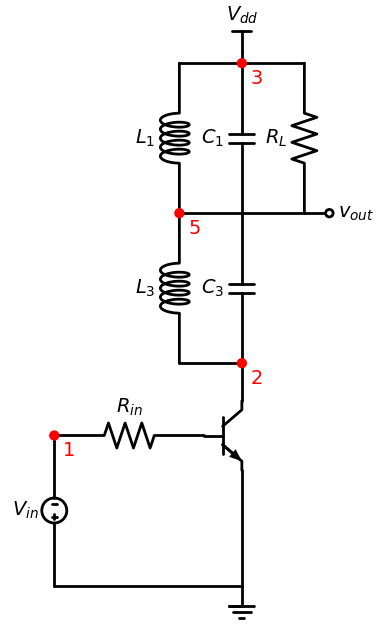

In [3]:
with schemdraw.Drawing() as d:
    d += (T := BjtNpn())
    d += (Ri := Resistor( d='left', xy=T.base, label='$R_{in}$'))
    #d.labelI(Ri, 'input current')
    d += (dot1 := Dot( color='red').label('1',  loc='center', ofst=[.3,-.3]))
    d += (Vi := SourceV(d='down',label='$V_{in}$', zoom=0.5))
    d += ( Line(d='right',  tox=T.emitter))
    d += ( Ground())
    d += ( Line(d='up',  toy=T.emitter))
    d += ( Line( xy=T.collector, d='up', l=0.75))
    d += (dot2 := Dot( color='red').label('2',  loc='center', ofst=[.3,-.3]))
    d += (C3 := Capacitor( d='up', label='$C_3$'))
    d += ( Line( xy=C3.start, d='left', l=1.25))
    d += (L3 := Inductor2( d='up', label='$L_3$'))
    d += (dot5 := Dot( color='red').label('5',  loc='center', ofst=[.3,-.3]))
    d += (C1 := Capacitor( xy=C3.end, d='up', label='$C_1$'))
    d += ( Line( xy=C1.start, d='left', l=1.25))
    d += (L1 := Inductor2( d='up', label='$L_1$'))
    d += ( Line( xy=C1.start, d='right', l=1.25))
    d += (R := Resistor( d='up', label='$R_L$'))
    d += ( Line( xy=R.start, d='right', l=0.5))
    d += (dot := Dot(open=True, rgtlabel='$v_{out}$'))
    d += ( Line(xy=R.end, d='left', tox=C1.end))
    d += (dot3 := Dot( color='red').label('3',  loc='center', ofst=[.3,-.3]))
    d += ( Line( d='right',xy=L1.end, tox=C1.end))
    d += ( Line( d='up',l=0.25))
    d += ( Vdd( label='$V_{dd}$'))

## Klasse F Circuit Analyse

In het schema identificeren we:
* **Knoop 1**: Ingang (AC koppeling)
* **Knoop 2**: Collector (fundamentele + harmonischen)  
* **Knoop 3**: Voeding (V<sub>dd</sub>)
* **Knoop 5**: Uitgang (gefilterde fundamentele)

* **Q1**: driving transistor
* **L1, C1**: Fundamentele resonantiekring (f<sub>o</sub>)
* **L3, C3**: 3e harmonische filter (3×f<sub>o</sub>)



Wanneer de gelijkaardige stroompulsen aangelegd worden op 2 parallelle LRC kringen in serie, zal dezelfde stroom door de kringen lopen, maar zullen de spanningen over beide kringen opgeteld worden.

Het grote voordeel van het bovenstaande schema is dat het toelaat meer energie toe te voegen aan de trilling bij eenzelfde geleidingshoek ($\alpha$) en bij eenzelfde maximale stroom ($I_{max}$)door de transistor. Hierdoor wordt het circuit efficienter en verlaagt dus verbruikerskost.

Het nadeel is natuurlijk dat de 2 extra componenten een extra investeringskost en extra plaats vragen op de print.

De spicefile {numref}`eSpicef` beschrijft het circuit van {numref}`ffig1`. De spanningen van de transiente simulatie worden getoond in {numref}`ffig2`. Het is in eerste instantie belangrijk om het verschil tussen knoop 2 en knoop 5 te bestuderen.

```{literalinclude} ./simul/classF.sp
:language: spice
:name: eSpicef
:caption: basis Klasse F circuit spice file
```

In [4]:
spicelisting("simul/classF.sp")

* klasse F basiscircuit
Q_Q1         2 1 0 Q2
L_L1         5 3   1uH
C_C1         5 3   10n
R_R1         5 3   60
V_V3         3 0   11V
V_V5         1 0   sin(0.7 0.8 1591500) DC=0.7
C_C3         5 2   10n
L_L3         5 2   0.111uH
.model Q2  NPN(Is=14.34f BF=200 RB=200 )

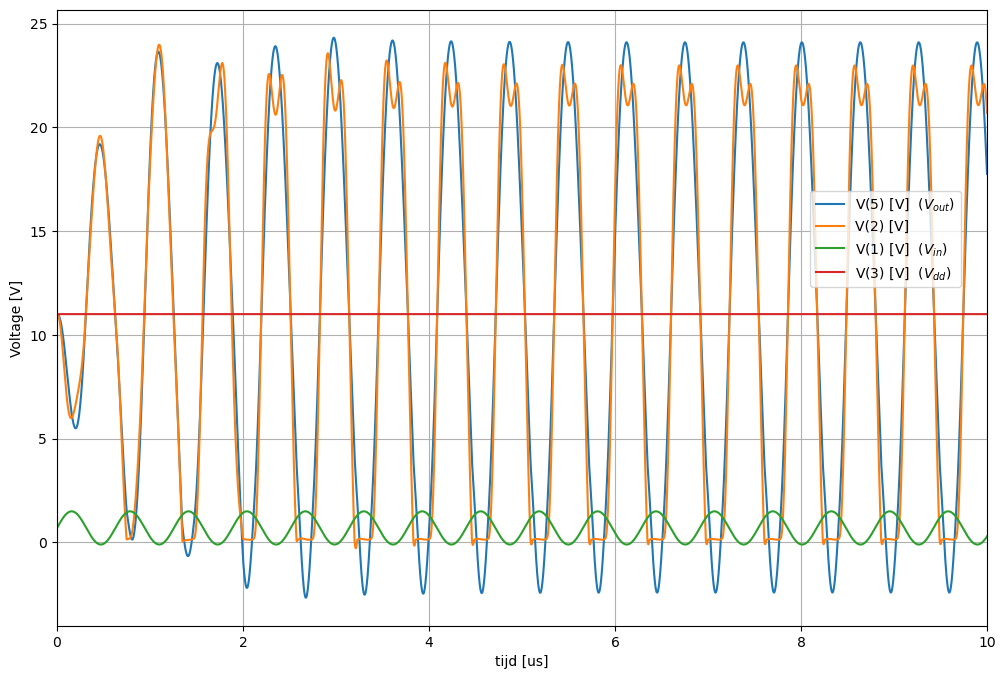

In [14]:
circuit=SpiceParser(path='simul/classF.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=2e-10, end_time=end_time)

figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]' )
ax.plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.legend( loc=(0.81,.55))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]');

## SPICE Simulatie - Interpretatie

### Simulatieparameters

- **Tijd**: 10 μs (meerdere perioden)
- **Frequentie**: ~1591 kHz fundamenteel
- **Temperatuur**: 25°C

### Wat te verwachten

* **Knoop 2**: Collector spanning met harmonischen
* **Knoop 5**: Gefilterde 3e harmonische
* **Stroom**: Pulsvormig door transistor
* **Efficiëntie**: Verhoogd t.o.v. Klasse C

Wanneer we op basis van de spanningen bekomen in de bovenstaande figuur de spanningen over de trilkring van de eerste harmonische en de spanningen over de trilkring van de derde harmonische plotten, zien we dat op moment dat de eerste harmonische een minimum bereikt, de derde harmonische piekt. Dit heeft een belangrijk voordeel, namelijk de spanning over het totale circuit wordt kleiner of er kan met dezelfde spanning een veel grotere swing bekomen worden.

{numref}`ffig3` toont de spanningen over beide trilkringen afzonderlijk. Hierdoor is de tegenfase van de derde harmonische veel duidelijker.

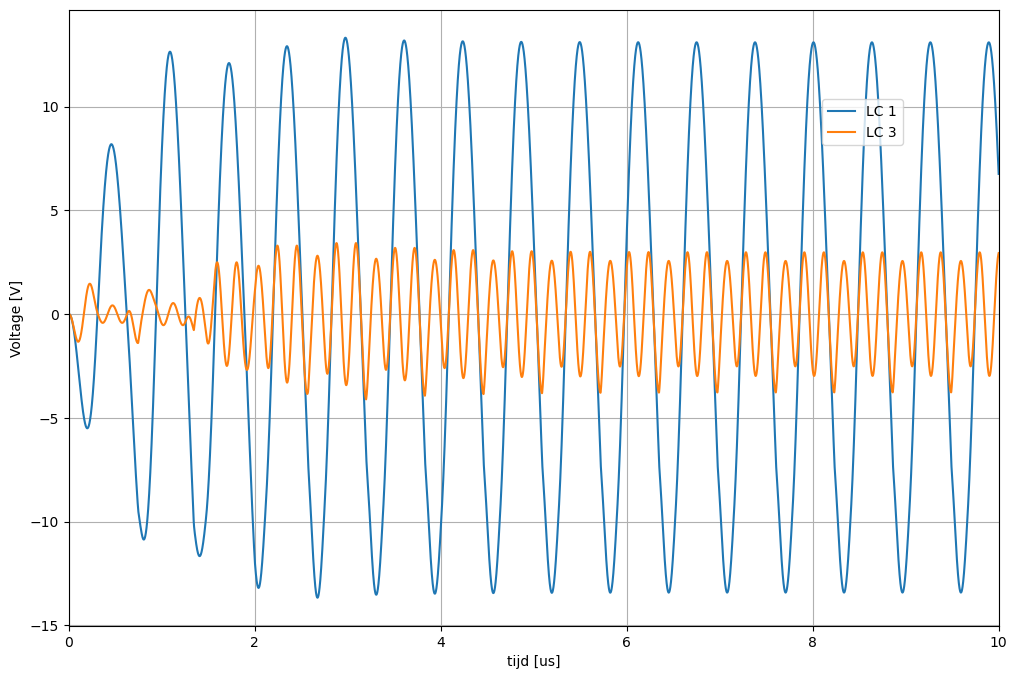

In [6]:
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['5']-analysis.nodes['3'],label='LC 1')
ax.plot(analysis.time*1e6,analysis.nodes['2']-analysis.nodes['5'],label='LC 3' )
ax.legend( loc=(0.81,.78))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

{numref}`ffig4` toont het verloop van de collectorstroom van de stuurtransistor. We merken in dit stroomverloop veel meer features terug. Het belangrijke hierin is dat de stroom veel meer een blokgolfpatroon vormt, wat een veel efficietere werking oplevert.

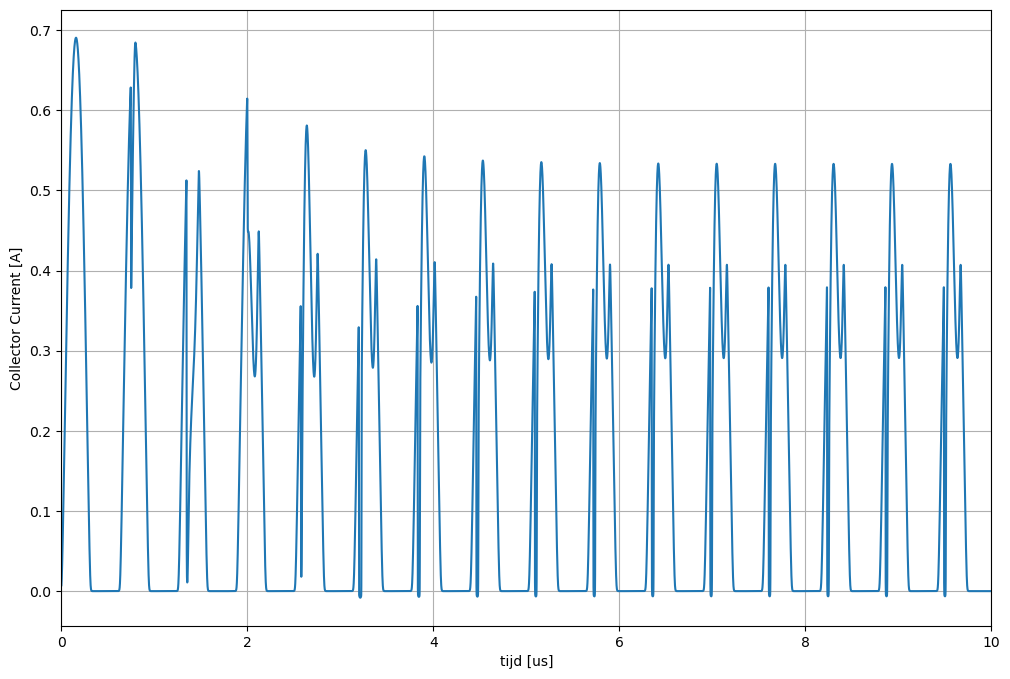

In [7]:
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,-analysis.branches['v_v3'],label='v_v3')
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Collector Current [A]')
plt.show()

{numref}`ffigy` toont in detail het stroom en spanningsverloop van de tweede en de 16de oscillatie na het opstarten. We zien dat de stroom in belangrijke mate terugvalt telkens de transistor in saturatie komt, maar ook dat er gedurende lange tijd behoorlijk wat stroom kan geleverd worden bij erg lage spanning over de transistor. Dat levert voor de klasse F veel hogere efficienties op.

We zien ook dat V(5) meer dan 2V negatief wordt. De AC zwaai aan de uitgang is hierdoor ook meer dan 2V groter dan de voedingsspanning (11V in dit geval).

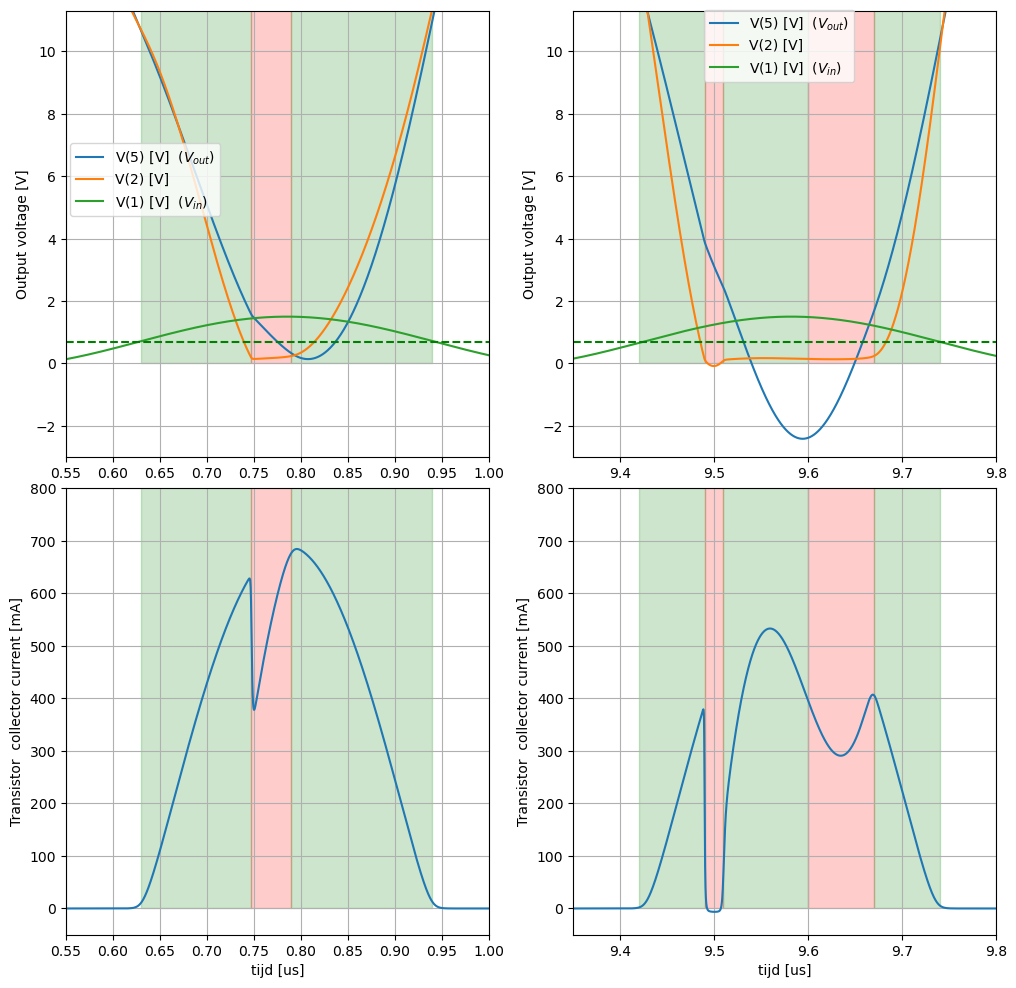

In [26]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
fig.subplots_adjust(hspace=0.07)
ax[0,0].plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax[0,0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]')
ax[0,0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)' )
ax[0,0].legend( loc=(0.01,.54))
ax[0,0].grid()
ax[0,0].axhline(y=0.7, color='green',linestyle='--')
ax[0,0].set_xlim(0.55,1.0)
ax[0,0].set_ylim(-3,11.3)
ax[0,0].set_ylabel('Output voltage [V]')
ax[0,0].fill_between(x=[0.63,0.747],y1=[12,12],color='green',alpha=0.2)
ax[1,0].fill_between(x=[0.63,0.747],y1=[900,900],color='green',alpha=0.2)
ax[0,0].fill_between(x=[0.747,0.79],y1=[12,12],color='red',alpha=0.2)
ax[1,0].fill_between(x=[0.747,0.79],y1=[900,900],color='red',alpha=0.2)
ax[0,0].fill_between(x=[0.79,0.94],y1=[12,12],color='green',alpha=0.2)
ax[1,0].fill_between(x=[0.79,0.94],y1=[900,900],color='green',alpha=0.2)
ax[1,0].plot(analysis.time*1e6,-analysis.branches['v_v3']*1e3)
ax[1,0].grid()
ax[1,0].set_xlabel('tijd [us]')
ax[1,0].set_xlim(0.55,1.0)
ax[1,0].set_ylim(-50,800)
ax[1,0].set_ylabel('Transistor  collector current [mA]')
ax[0,1].plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax[0,1].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]')
ax[0,1].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)' )
ax[0,1].legend( loc=(0.31,.84))
ax[0,1].grid()
ax[0,1].set_xlim(9.35,9.8)
ax[0,1].set_ylim(-3,11.3)
ax[0,1].set_ylabel('Output voltage [V]')
ax[0,1].axhline(y=0.7, color='green',linestyle='--')
ax[1,1].plot(analysis.time*1e6,-analysis.branches['v_v3']*1e3)
ax[1,1].grid()
ax[1,1].set_xlabel('tijd [us]')
ax[1,1].set_xlim(9.35,9.8)
ax[1,1].set_ylim(-50,800)
ax[1,1].set_ylabel('Transistor  collector current [mA]')
ax[0,1].fill_between(x=[9.42,9.49],y1=[12,12],color='green',alpha=0.2)
ax[1,1].fill_between(x=[9.42,9.49],y1=[900,900],color='green',alpha=0.2)
ax[0,1].fill_between(x=[9.49,9.51],y1=[12,12],color='red',alpha=0.2)
ax[1,1].fill_between(x=[9.49,9.51],y1=[900,900],color='red',alpha=0.2)
ax[0,1].fill_between(x=[9.51,9.6],y1=[12,12],color='green',alpha=0.2)
ax[1,1].fill_between(x=[9.51,9.6],y1=[900,900],color='green',alpha=0.2)
ax[0,1].fill_between(x=[9.6,9.67],y1=[12,12],color='red',alpha=0.2)
ax[1,1].fill_between(x=[9.6,9.67],y1=[900,900],color='red',alpha=0.2)
ax[0,1].fill_between(x=[9.67,9.74],y1=[12,12],color='green',alpha=0.2)
ax[1,1].fill_between(x=[9.67,9.74],y1=[900,900],color='green',alpha=0.2);

## Analyse van de Simulatieresultaten

### Belangrijke waarnemingen

#### Spanningsverschillen

* **Knoop 2 vs Knoop 5**: Toont effect van 3e harmonische filter
* **Kleurgecodeerde zones**: 
  * 🟢 **Groen**: Transistor UIT (hoge spanning)
  * 🔴 **Rood**: Transistor AAN (lage spanning)

#### Harmonische werking

De 3e harmonische filter zorgt voor:
* **Golfvorming**: Verbeterde collector spanning
* **Efficiëntie**: Verminderd energieverlies  
* **Vermogen**: Optimale energieoverdracht

## Efficiëntie van Klasse F Versterkers

### Theoretische efficiëntie

* **Klasse A**: Max 50%
* **Klasse B**: Max 78.5%  
* **Klasse C**: 85-90%
* **Klasse F**: Tot 100% (theoretisch)

### Praktische voordelen

* **Energiebesparing**: Lagere operationele kosten
* **Koeling**: Minder warmteontwikkeling
* **Batterijduur**: Langer bij draagbare apparaten
* **Vermogen**: Meer output bij zelfde transistor

### Compromissen

* ⚡ **Voordeel**: Hogere efficiëntie
* 💰 **Nadeel**: Meer componenten (kosten)
* 📐 **Nadeel**: Complexer ontwerp
* 📏 **Nadeel**: Meer PCB ruimte

## Alternatieve schema's van de klasse F versterker

Zoals bij de klasse C, kunnen we ook bij de klasse F een alternatief schema uitwerken waarbij de oscillatie rond de grond plaatsvindt. {numref}`ffig5` toont dit schema, de spicefile kunnen we bekijken in {numref}`listingf2` en de resultaten van deze simulatie kunnen we terugvinden in {numref}`ffig6`.

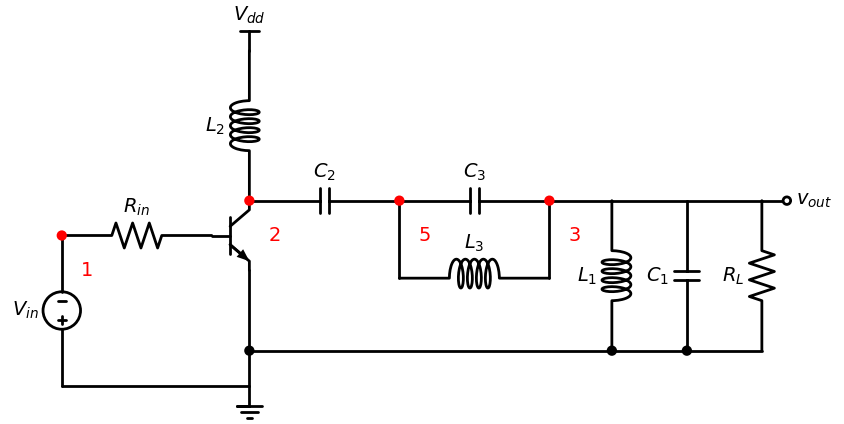

In [8]:
with schemdraw.Drawing() as d:
    d += (T := BjtNpn())
    d += (Ri := Resistor( d='left', xy=T.base, label='$R_{in}$'))
    d += (dot1 := Dot(color='red').label('1',  loc='center', ofst=[.5,-.7]))
    #d.labelI(Ri, 'input current')
    d += (Vi := SourceV(d='down',label='$V_{in}$',zoom=0.75))
    d += ( Line(d='right',  tox=T.emitter))
    d += ( Ground())
    d += ( Line(d='up',  toy=T.emitter))
    d += (dot2 := Dot( xy=T.collector,color='red').label('2',  loc='center', ofst=[.5,-.7]))
    d += (L2 := Inductor2( d='up', label='$L_2$'))
    d += ( Vdd( label='$V_{dd}$'))
    d += (C2 := Capacitor( xy=T.collector, d='right', label='$C_2$'))
    d += (dot5 := Dot(color='red').label('5',  loc='center', ofst=[.5,-.7]))
    d += (C3 := Capacitor( d='right', label='$C_3$'))
    d += ( Line( xy=C3.start, d='down', l=1.55))
    d += (L3 := Inductor2( d='right', label='$L_3$'))
    d += ( Line( d='up', l=1.55))
    d += (dot3 := Dot(color='red').label('3',  loc='center', ofst=[.5,-.7]))
    d += Line( d='right', l=1.25)
    d += (L1 := Inductor2( d='down', label='$L_1$'))
    d += Line( xy=L1.start, d='right', l=1.5)
    d += (C1 := Capacitor( d='down', label='$C_1$'))
    d += Line( xy=C1.start, d='right', l=1.5)
    d += (R := Resistor( d='down', label='$R_L$'))
    d += Line( xy=R.start, d='right', l=0.5)
    d += Dot(open=True, rgtlabel='$v_{out}$')
    d += Line(xy=R.end, d='left', tox=C1.end)
    d += Dot()
    d += Line( d='left',xy=C1.end, tox=L1.end)
    d += Dot()
    d += Line( xy=L1.end,  tox=T.emitter, d='left')
    d += Dot()

```{literalinclude} ./simul/classF.sp
:language: spice
:name: listingf2
:caption: Klasse F circuit waarbij de uitgang oscilleert rond de grond
```

In [9]:
spicelisting('simul/classF2.sp')

* klasseF
Q_Q1         2 1 0 Q2
L_L1         0 3   1uH
C_C1         0 3   10n
R_R1         0 3   100
V_V3         4 0   10V
V_V5         1 0   sin(0.4 0.8 1591500) DC=0.4
C_C3         5 3   10n
L_L3         6 3   0.111uH
R_R3         6 5   0.001
L_L2         2 4   2mH
C_C2         2 5   1000n
.model Q2  NPN(Is=14.34f BF=200 Rb=100 )

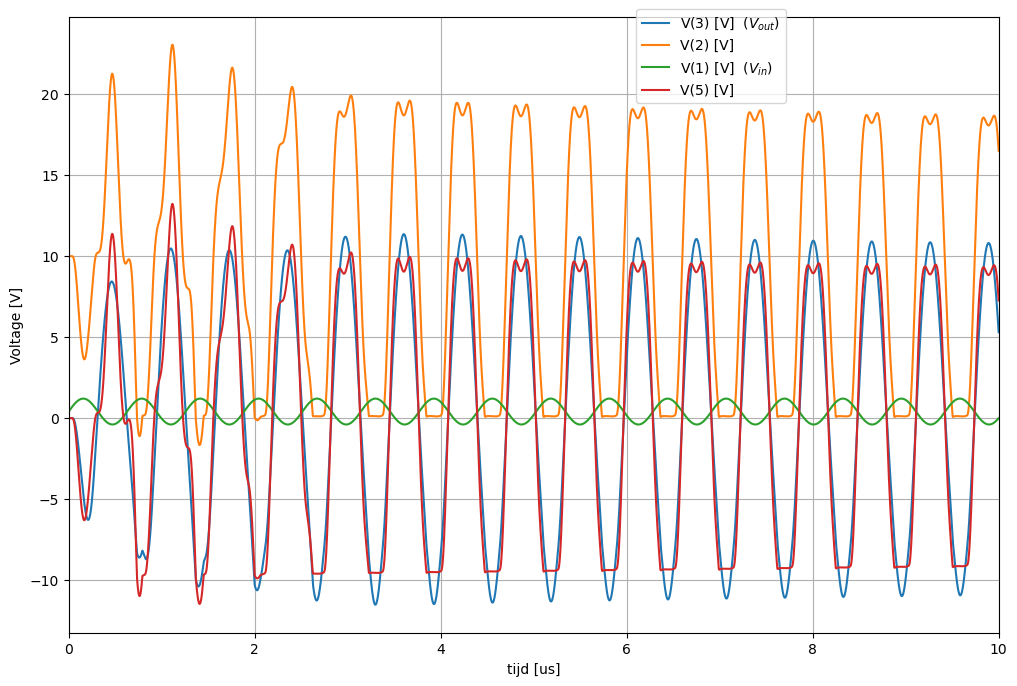

In [10]:
circuit=SpiceParser(path='simul/classF2.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=2e-10, end_time=end_time)

figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  (Vout)')
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]' )
ax.plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  (Vin)' )
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V] ' )
ax.legend( loc=(0.61,.86))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

## Waarom een alternatief schema? 

Het alternatieve schema biedt:
* **Aarding**: Oscillatie rond 0V ipv VCC
* **Eenvoud**: Gemakkelijkere metingen
* **Praktisch**: Beter voor sommige toepassingen

### Vergelijking schemas
| Aspect | Origineel Schema | Alternatief Schema |
|--------|------------------|-------------------|
| **Oscillatie** | Rond VCC | Rond 0V (aarde) |
| **Metingen** | Moeilijker | Eenvoudiger |
| **DC koppeling** | Via L2 | Andere configuratie |
| **Prestaties** | Identiek | Identiek |

{numref}`ffig7` toont het resultaat van de spanningen over de individuele trilkringen. Het toevoegen van de spoel $L_2$ en de capaciteit $C_2$ geeft aanleiding tot een bijkomen risico op extra oscillaties. In het geval van deze simulaties zijn deze 2 componenten zo extreem groot genomen dat er hier geen zwevingen zichtbaar zijn.

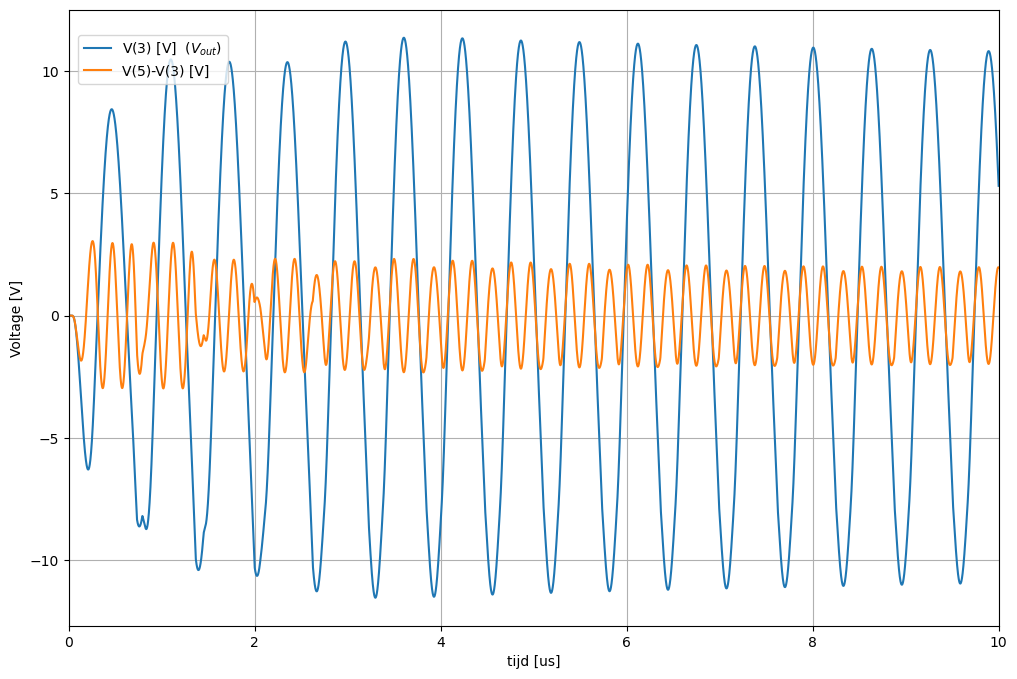

In [11]:
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e6,analysis.nodes['5']-analysis.nodes['3'],label='V(5)-V(3) [V]' )
ax.legend( loc=(0.01,.88))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

## Praktische Toepassingen

### Waar worden Klasse F versterkers gebruikt?

#### 📡 **RF Zenders**

* FM radio stations
* TV zenders  
* Mobiele basisstations
* Satellietcommunicatie

#### 🔬 **Industriële toepassingen**

* RF verwarming
* Plasma generatoren
* Medische diathermie
* Inductieve verwarming

### Ontwerpoverwegingen

* **Frequentieselectie**: Fundamenteel + harmonischen
* **Q-factor**: Bandbreedte vs efficiëntie
* **Componenttoleranties**: Precisie vereist
* **Thermisch management**: Koeling

## Samenvatting en Conclusies

### Klasse F kenmerken

* **Hoogfrequent**: Resonante versterkers voor vaste frequenties
* **Efficiënt**: Tot 95% praktische efficiëntie mogelijk
* **Harmonisch**: 3e harmonische filter is essentieel
* **Selectief**: Smalle bandbreedte (~1% van f<sub>o</sub>)

### Voordelen vs Nadelen

| ✅ **Voordelen** | ❌ **Nadelen** |
|------------------|----------------|
| Zeer hoge efficiëntie | Meer componenten |
| Minder warmte | Complexer ontwerp |
| Meer vermogen | Hogere kosten |
| Energiebesparing | Meer PCB ruimte |

## 🔍 **Wanneer gebruiken?**
- **Ideaal**: RF toepassingen, vaste frequentie
- **Vermijd**: Breedband audio, variabele frequentie